In [1]:
#Loading dataset
import pandas as pd 
dataSet = pd.read_csv('/Users/divyatmika/Desktop/communities.csv')
dataSetTemp = pd.read_csv('/Users/divyatmika/Desktop/communities.csv')

In [2]:
#There are total number of rows : and columns 
print("Total no of columns:")
print(dataSet.shape[1])
print("Total no of rows:")
print(dataSet.shape[0])

Total no of columns:
128
Total no of rows:
1994


In [3]:
#Dividing dataset into test and train : 
trainSet = dataSet[:1495]

In [4]:
trainSet.shape[0]

1495

In [5]:
testSet = dataSet[1495:]

In [6]:
len(testSet)


499

# 1.(b.) Handle missing values. Data imputation technique

In [7]:
dataSet.describe() #to check missing values. print summary of the data 

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#dropping non predictive values : first 5 
dataSet.drop(columns=['state', 'county','community','communityname','fold'],inplace=True)

In [9]:
#replace missing values as Nan 
import numpy as np
dataSet.replace('?', np.NaN,inplace=True)

In [10]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)


In [11]:
dataSet = imp.fit_transform(dataSet)

In [12]:
dataSet

array([[ 0.19      ,  0.33      ,  0.02      , ...,  0.32      ,
         0.14      ,  0.2       ],
       [ 0.        ,  0.16      ,  0.12      , ...,  0.        ,
         0.19507837,  0.67      ],
       [ 0.        ,  0.42      ,  0.49      , ...,  0.        ,
         0.19507837,  0.43      ],
       ..., 
       [ 0.16      ,  0.37      ,  0.25      , ...,  0.91      ,
         0.28      ,  0.23      ],
       [ 0.08      ,  0.51      ,  0.06      , ...,  0.22      ,
         0.18      ,  0.19      ],
       [ 0.2       ,  0.78      ,  0.14      , ...,  1.        ,
         0.13      ,  0.48      ]])

# 1(c.) Plot a correlation matrix for the features

In [13]:
dataframe = pd.DataFrame.from_records(dataSet)
columnNames = list(dataSetTemp.head(0)) 
colNames = columnNames[5:128]
dataframe.columns = colNames
dataframe.shape[1]

123

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataframe.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# Calculate coefficient of variation for each feature : 

In [15]:
cv = {}
for i in range(0,123,1): 
    m = dataframe[colNames[i]].mean()
    v = dataframe[colNames[i] ].var()
    cv_val = v/m
    cv.update({colNames[i] : cv_val})
print('The covariance for each feature is : ')
print(cv)

The covariance for each feature is : 
{'population': 0.27963732520456813, 'householdsize': 0.05784084345642062, 'racepctblack': 0.3575865717066568, 'racePctWhite': 0.07901545572587641, 'racePctAsian': 0.2838983518414161, 'racePctHisp': 0.37530606373648323, 'agePct12t21': 0.05677678569717956, 'agePct12t29': 0.04173289092527955, 'agePct12t24': 0.08244647956263235, 'agePct65up': 0.07587461274512451, 'numbUrban': 0.25673593645385706, 'pctUrban': 0.28416671204672195, 'medIncome': 0.12137861946877355, 'pctWWage': 0.059942374864642566, 'pctWFarmSelf': 0.14288145085656379, 'pctWInvInc': 0.06397007068243481, 'pctWSocSec': 0.06398065010727577, 'pctWPubAsst': 0.15528036417526858, 'pctWRetire': 0.0585868328648185, 'medFamInc': 0.10462640735030258, 'perCapInc': 0.10427519629125775, 'whitePerCap': 0.09481285611523624, 'blackPerCap': 0.10114900342256508, 'indianPerCap': 0.13341616936292244, 'AsianPerCap': 0.11845687043018215, 'OtherPerCap': 0.12806655962523747, 'HispPerCap': 0.08677283376112195, 'Num

#    1(e.) Scatterplots and Boxplots for features with highest CV

In [16]:

sorted_by_value = sorted(cv.items(), key=lambda kv: kv[1])

In [17]:
sorted_by_value.reverse()

In [18]:
import math as math
n_features = math.floor(math.sqrt(128))
sorted_by_value[0:n_features]

[('LemasPctOfficDrugUn ', 0.6141026781321143),
 ('NumStreet \n', 0.4425338663304639),
 ('racePctHisp', 0.37530606373648323),
 ('NumInShelters \n', 0.3576337145939163),
 ('racepctblack', 0.3575865717066568),
 ('NumIlleg', 0.32538235697262574),
 ('PctUsePubTrans \n', 0.32449567095255377),
 (' PctNotSpeakEnglWell \n', 0.3205804398052116),
 ('PctRecImmig5 ', 0.3066731948204922),
 (' PctRecentImmig ', 0.30655261394085553),
 ('PctRecImmig8', 0.30331775534204675)]

In [19]:
#scatterplots 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dataplot = dataframe[['LemasPctOfficDrugUn ','NumStreet \n','racePctHisp','NumInShelters \n','racepctblack','NumIlleg','PctUsePubTrans \n',' PctNotSpeakEnglWell \n','PctRecImmig5 ',' PctRecentImmig ','PctRecImmig8']]



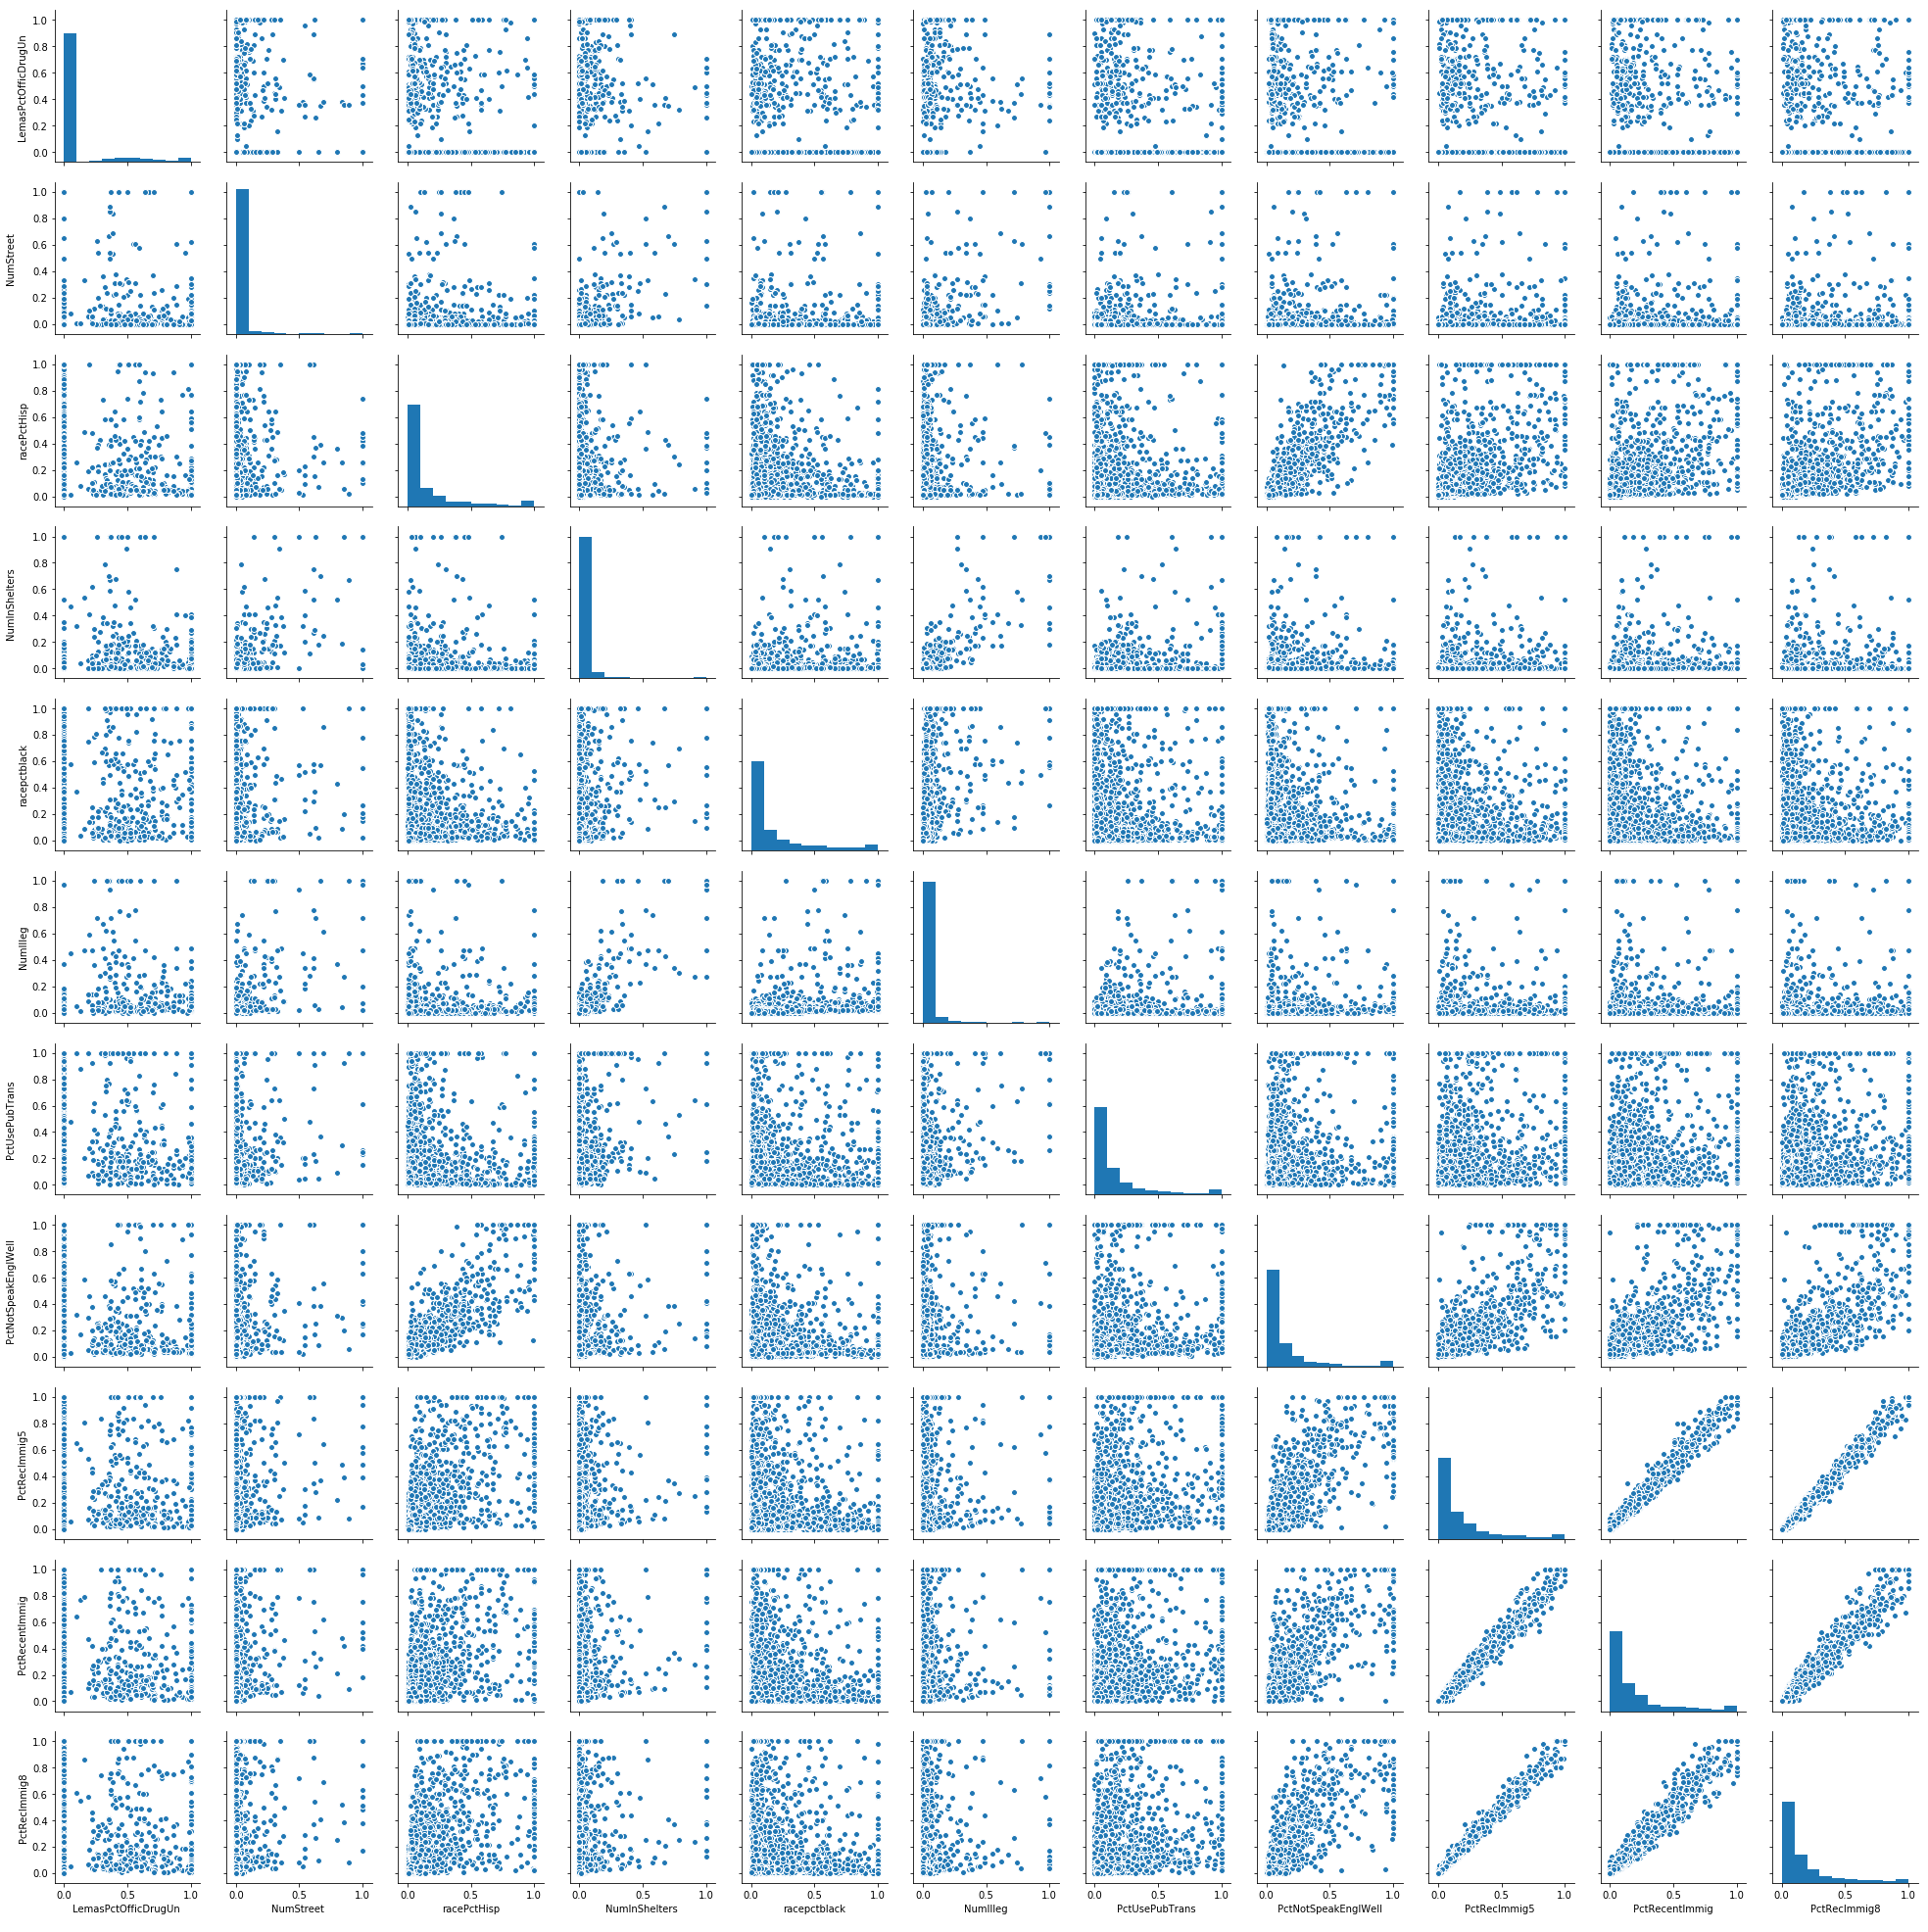

In [189]:
sns.pairplot(dataplot)
plt.show()

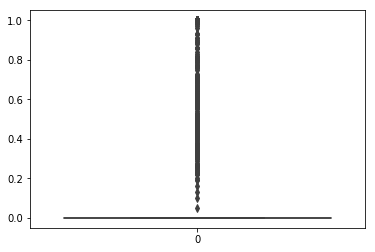

In [114]:
sns.boxplot(data=dataframe['LemasPctOfficDrugUn '])
plt.show()

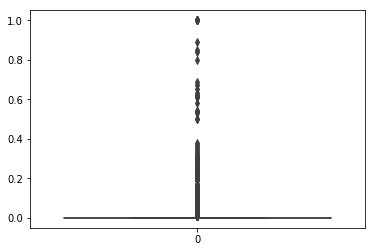

In [195]:
sns.boxplot(data=dataframe['NumStreet \n'])
plt.show()

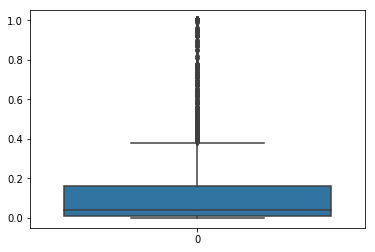

In [115]:
sns.boxplot(data=dataframe['racePctHisp'])
plt.show()

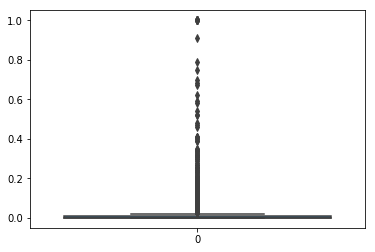

In [116]:

sns.boxplot(data=dataframe['NumInShelters \n'])
plt.show()

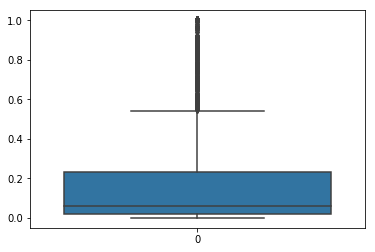

In [117]:
sns.boxplot(data=dataframe['racepctblack'])
plt.show()

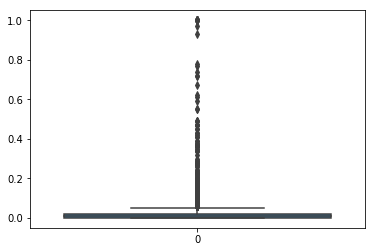

In [118]:
sns.boxplot(data=dataframe['NumIlleg'])
plt.show()

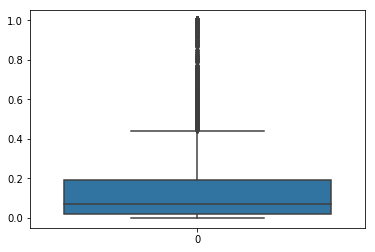

In [119]:
sns.boxplot(data=dataframe['PctUsePubTrans \n'])
plt.show()

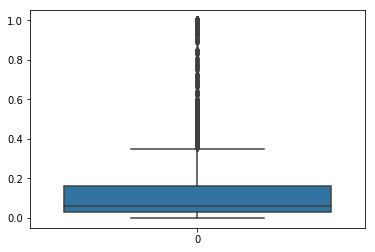

In [120]:

sns.boxplot(data=dataframe[' PctNotSpeakEnglWell \n'])
plt.show()

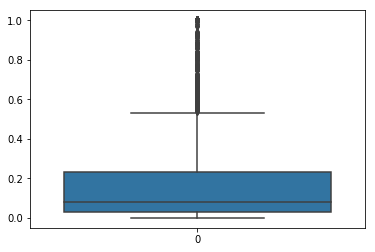

In [121]:
 sns.boxplot(data=dataframe['PctRecImmig5 '])
plt.show()

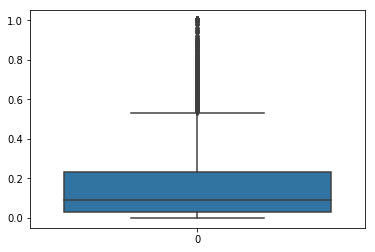

In [122]:
 sns.boxplot(data=dataframe['PctRecImmig8'])
plt.show()

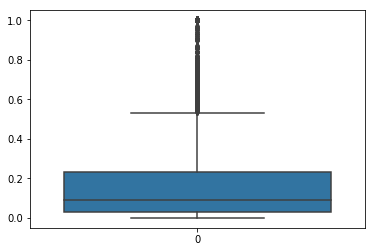

In [123]:
sns.boxplot(data=dataframe[' PctRecentImmig '])
plt.show()

# 1(f.) Linear model with train and test error 

In [20]:
dataframeCopy = dataframe.copy()

In [21]:
X = dataframeCopy.drop('ViolentCrimesPerPop ',axis = 1)
Y = dataframeCopy["ViolentCrimesPerPop "]

In [22]:
#prepare trainig and test data set 
X_train = X[0:1495]
X_test = X[1495:]
Y_train = Y[0:1495]
Y_test = Y[1495:]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Model Intialization
reg = LinearRegression()
# Data Fitting for test data
reg = reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
#for train data : 
Y_pred_train = reg.predict(X_train)


In [23]:
#model evaluation 
mse = mean_squared_error(Y_test, Y_pred)
mse_train = mean_squared_error(Y_train, Y_pred_train)

print('MSE for test model :')
print(mse)
print('MSE for train model :')
print(mse_train)

MSE for test model :
0.789725527421
MSE for train model :
0.0162696157417


# Linear model : test error : 0.789725527421

In [24]:
len(Y_test)

499

#   1.(f.) Ridge Regression with cross vslidation on alphas 

In [25]:
alphas = 10**np.linspace(6,-2,50)*0.5 # choose a range of alpha
alphas

array([  5.00000000e+05,   3.43324423e+05,   2.35743318e+05,
         1.61872877e+05,   1.11149824e+05,   7.63208984e+04,
         5.24056567e+04,   3.59842837e+04,   2.47085668e+04,
         1.69661089e+04,   1.16497591e+04,   7.99929360e+03,
         5.49270571e+03,   3.77156003e+03,   2.58973734e+03,
         1.77824015e+03,   1.22102655e+03,   8.38416468e+02,
         5.75697700e+02,   3.95302161e+02,   2.71433772e+02,
         1.86379686e+02,   1.27977396e+02,   8.78755312e+01,
         6.03396320e+01,   4.14321386e+01,   2.84493301e+01,
         1.95346997e+01,   1.34134790e+01,   9.21034985e+00,
         6.32427608e+00,   4.34255687e+00,   2.98181166e+00,
         2.04745753e+00,   1.40588435e+00,   9.65348864e-01,
         6.62855683e-01,   4.55149089e-01,   3.12527596e-01,
         2.14596713e-01,   1.47352585e-01,   1.01179482e-01,
         6.94747747e-02,   4.77047738e-02,   3.27564278e-02,
         2.24921633e-02,   1.54442180e-02,   1.06047544e-02,
         7.28174239e-03,

In [26]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
#Again we perform 10-fold cross-validation to choose the best alpha,
#refit the mode, 
#compute the associated test error and print the best models coefficients .
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, Y_train)
print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_train, Y_train)
print("mse = ",mean_squared_error(Y_test, ridge6.predict(X_test)))
print("best model coefficients:")
pd.Series(ridge6.coef_, index=X.columns)

Alpha= 0.0477047738175
mse =  0.0175592847131
best model coefficients:


population                -0.029681
householdsize              0.014665
racepctblack               0.190708
racePctWhite              -0.069807
racePctAsian              -0.033969
racePctHisp               -0.007755
agePct12t21                0.043972
agePct12t29               -0.171291
agePct12t24               -0.025257
agePct65up                 0.047599
numbUrban                 -0.016747
pctUrban                   0.040168
medIncome                  0.030190
pctWWage                  -0.049306
pctWFarmSelf               0.024538
pctWInvInc                -0.121763
pctWSocSec                 0.056181
pctWPubAsst                0.047156
pctWRetire                -0.104898
medFamInc                  0.028272
perCapInc                 -0.026412
whitePerCap               -0.042182
blackPerCap               -0.028527
indianPerCap              -0.030611
AsianPerCap                0.029415
OtherPerCap                0.025163
HispPerCap                 0.028031
NumUnderPov               -0

In [27]:
print("mse ridge = ",mean_squared_error(Y_test, ridge6.predict(X_test)))

mse ridge =  0.0175592847131


# Ridge Regression model : Test error reported : 0.0175592847131
lambda value reported : 0.0477047738175

# 1(h.) Lasso with non-normalized and normalized data

In [28]:
from sklearn import cross_validation
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, Y_train)
print("mse = ",mean_squared_error(Y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Alpha= 0.000108319301275
mse =  0.0177746135707
best model coefficients:


population                -0.000000
householdsize              0.000000
racepctblack               0.272499
racePctWhite              -0.000000
racePctAsian              -0.016658
racePctHisp                0.000000
agePct12t21                0.071095
agePct12t29               -0.277847
agePct12t24                0.000000
agePct65up                 0.001175
numbUrban                 -0.000000
pctUrban                   0.040731
medIncome                  0.000000
pctWWage                  -0.088919
pctWFarmSelf               0.027718
pctWInvInc                -0.103543
pctWSocSec                 0.053919
pctWPubAsst                0.040113
pctWRetire                -0.109180
medFamInc                  0.000000
perCapInc                 -0.000000
whitePerCap               -0.062682
blackPerCap               -0.021766
indianPerCap              -0.031491
AsianPerCap                0.029133
OtherPerCap                0.023116
HispPerCap                 0.024833
NumUnderPov               -0

# For non-normalized features : lasso model gives the test mse as : 0.0177746135707

In [229]:
from sklearn import cross_validation
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, Y_train)
print("mse = ",mean_squared_error(Y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

Alpha= 1.84055318963e-05
mse =  0.017826830036
best model coefficients:


population                -0.000000
householdsize              0.000000
racepctblack               0.267046
racePctWhite              -0.000000
racePctAsian              -0.006416
racePctHisp               -0.000000
agePct12t21                0.072089
agePct12t29               -0.280218
agePct12t24                0.000000
agePct65up                 0.000000
numbUrban                 -0.000000
pctUrban                   0.037704
medIncome                  0.000000
pctWWage                  -0.071360
pctWFarmSelf               0.021428
pctWInvInc                -0.116960
pctWSocSec                 0.054849
pctWPubAsst                0.029348
pctWRetire                -0.105991
medFamInc                  0.000000
perCapInc                 -0.000000
whitePerCap               -0.049459
blackPerCap               -0.021506
indianPerCap              -0.031885
AsianPerCap                0.026856
OtherPerCap                0.020548
HispPerCap                 0.022455
NumUnderPov               -0

# Results for Lasso model : Normalised mse test error : 0.017826830036
List of coefficients as shown above for normlaised and non-normalised : 
On comparing we can see that there are more few model coefficients for normalised lasso model is ZERO than non-normalised ones. 
Also, the test MSE is comaprable. 

# 1(i.) PCA model


In [30]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), Y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], Y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3116: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


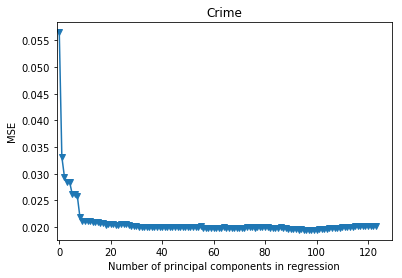

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
#performing 10CV to check how it influencecs MSE
pca2 = PCA()


# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 124 principle components, adding one component at the time.
for i in np.arange(1, 124):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Crime')
plt.xlim(xmin=-1);

In [32]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], Y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)


0.022570459746707915

In [42]:

X_reduced_test = pca2.transform(scale(X_test))[:,:97]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:97], Y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
print('Test error obtained is : ')
mean_squared_error(Y_test, pred)

Test error obtained is : 


0.018819644010020908

In [127]:
print("Number of components : ",ind)

Number of components :  60


# For PCA model with CV, the test mse : 0.018819644010020908 and number of components is 60. 


# 1(j) Boosting 

In [125]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [33]:
target = 'ViolentCrimesPerPop '

In [29]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [30]:
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, preds))



In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
predictors = [x for x in X_train.columns]
data_dmatrix = xgb.DMatrix(data=dataframe[predictors],label=dataframe[target])
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

#cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    #num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
xgb_model = xgb.XGBRegressor()

xgb_grid = GridSearchCV(xgb_model,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [54]:
xgb_grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   38.9s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'nthread': [4], 'objective': ['reg:linear'], 'learning_rate': [0.03, 0.05, 0.07], 'max_depth': [5, 6, 7], 'min_child_weight': [4], 'silent': [1], 'subsample': [0.7], 'colsample_bytree': [0.7], 'n_estimators': [500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

# Lets check the best score after GridCV and best parameters for the model!

In [55]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
from sklearn.metrics import r2_score
print(r2_score(Y_test, xgb_grid.best_estimator_.predict(X_test))) 

0.638121645722
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [132]:

print(r2_score(Y_test, xgb_grid.best_estimator_.predict(X_test))) 
print("the test error for L1 penalised boosting ")
print(mse_error)

the test error for L1 penalised boosting 
0.017011394789952346


# Results about Boosting  : 
In boosting : 
About the trade-off in the number of trees and the shrinkage and good defaults for sub-sampling.
Different ideas on limiting tree size and good defaults for tree depth and the number of terminal nodes.
Grid search strategies used! 


# TEST ERROR FOR BOOSTING IS 0.017011394789952347 and best alpha is 0.2

# Tree-Based Methods

In [24]:
aps_failure_train_data = pd.read_csv('/Users/divyatmika/Desktop/Di/aps_failure_training_set.csv',na_values="na")
aps_failure_test_data = pd.read_csv('/Users/divyatmika/Desktop/Di/aps_failure_test_set.csv',na_values="na")

In [25]:
# First we need to convert the class column from string to binary values
aps_failure_train_data['targetVar'] = 1
aps_failure_train_data['targetVar'] = np.where(aps_failure_train_data['class']=='neg', 0, aps_failure_train_data['targetVar'])
aps_failure_train_data.drop('class', axis=1, inplace=True)
aps_failure_test_data ['targetVar'] = 1
aps_failure_test_data['targetVar'] = np.where(aps_failure_test_data ['class']=='neg', 0, aps_failure_test_data ['targetVar'])
aps_failure_test_data .drop('class', axis=1, inplace=True)

# Standardize the class column to the name of targetVar
aps_failure_train_data = aps_failure_train_data.rename(columns={'class': 'targetVar'})
aps_failure_test_data  = aps_failure_test_data .rename(columns={'class': 'targetVar'})

In [26]:
print(aps_failure_train_data.describe())

             aa_000        ab_000        ac_000        ad_000        ae_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000   

             af_000        ag_000        ag_001        ag_002        ag_003  \
count  57500.000000  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04   
mean      11.006817  2.216364e+02  9.757223e+02  8.606015e+03  8.859128e+04   
std      209.792592  2.047846e+04  3.420053e+04  1.

In [27]:
print(aps_failure_train_data.groupby('targetVar').size())

targetVar
0    59000
1     1000
dtype: int64


In [28]:
#combining test and train dataset
aps_dataset = aps_failure_train_data.append(aps_failure_test_data )

In [29]:
print("No of rows and columns : ")
print(aps_dataset.shape[0],aps_dataset.shape[1])

No of rows and columns : 
76000 171


# 2(b.) (i.) Handling missing dataset:

In [30]:
aps_dataset.describe() #Train plus test dataset. 

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,targetVar
count,7.600000e+04,17308.000000,7.173900e+04,5.715800e+04,72810.000000,72810.000000,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,...,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,72514.000000,72515.000000,76000.000000
mean,6.115976e+04,0.725560,3.564398e+08,1.506300e+05,6.736959,10.836314,2.004306e+02,1.204761e+03,9.697328e+03,9.364902e+04,...,2.132460e+05,4.506478e+05,4.006204e+05,3.378689e+05,3.475611e+05,1.398968e+05,8.424984e+03,0.085197,0.219044,0.018092
std,2.647366e+05,3.311913,7.952530e+08,3.590593e+07,153.446469,201.594853,1.843612e+04,5.099091e+04,1.718996e+05,8.244157e+05,...,5.518865e+05,1.189909e+06,1.151635e+06,1.097909e+06,1.707593e+06,4.692327e+05,4.875440e+04,4.179600,10.237051,0.133285
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.600000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.184000e+03,2.730000e+03,3.646000e+03,5.300000e+02,1.120000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,3.081300e+04,0.000000,1.540000e+02,1.280000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.126720e+05,2.230020e+05,1.909860e+05,9.353600e+04,4.126000e+04,3.862000e+03,0.000000e+00,0.000000,0.000000,0.000000
75%,4.884000e+04,0.000000,9.700000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.184100e+05,4.676340e+05,4.032900e+05,2.761800e+05,1.680460e+05,1.395000e+05,2.000000e+03,0.000000,0.000000,0.000000
max,4.294967e+07,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,1.047252e+07,1.914916e+07,7.305747e+07,...,3.775839e+07,9.715238e+07,5.743524e+07,4.215944e+07,1.195801e+08,1.926740e+07,4.570398e+06,482.000000,1720.000000,1.000000


In [82]:
print(aps_dataset.isnull().sum())

aa_000           0
ab_000       58692
ac_000        4261
ad_000       18842
ae_000        3190
af_000        3190
ag_000         860
ag_001         860
ag_002         860
ag_003         860
ag_004         860
ag_005         860
ag_006         860
ag_007         860
ag_008         860
ag_009         860
ah_000         820
ai_000         792
aj_000         792
ak_000        5598
al_000         811
am_0           792
an_000         811
ao_000         751
ap_000         811
aq_000         751
ar_000        3487
as_000         792
at_000         792
au_000         792
             ...  
dm_000        5103
dn_000         881
do_000        3488
dp_000        3490
dq_000        3490
dr_000        3490
ds_000        3491
dt_000        3491
du_000        3490
dv_000        3490
dx_000        3487
dy_000        3488
dz_000        3485
ea_000        3485
eb_000        5101
ec_00        12883
ed_000       12012
ee_000         863
ee_001         863
ee_002         863
ee_003         863
ee_004      

In [31]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
entireDataset = imp.fit_transform(aps_dataset)

In [32]:
entireDataset

array([[  7.66980000e+04,   7.25560434e-01,   2.13070644e+09, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.30580000e+04,   7.25560434e-01,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.10400000e+04,   7.25560434e-01,   2.28000000e+02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  7.96360000e+04,   7.25560434e-01,   1.67000000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.10000000e+02,   7.25560434e-01,   3.60000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.00000000e+00,   0.00000000e+00,   6.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [33]:
apsdata = pd.DataFrame.from_records(entireDataset)

# 2(b.) (ii.) cal coefficient of variation.

In [34]:
colnames_apsdata = list(aps_dataset.head(0)) 
apsdata.columns = colnames_apsdata

In [35]:
cv_aps = {}
for i in range(0,170,1): 
    if colnames_apsdata != 'targetVar':
        m = apsdata[colnames_apsdata[i]].mean()
        v = apsdata[colnames_apsdata[i] ].var()
        cv_valaps = v/m
        cv_aps.update({colnames_apsdata[i] : cv_valaps})
        
print('The covariance for each feature is : ')
print(cv_aps)

The covariance for each feature is : 
{'aa_000': 1145940.9805159273, 'ab_000': 3.4426910224051395, 'ac_000': 1674811031.218511, 'ad_000': 6436987419.389505, 'ae_000': 3348.3208791020775, 'af_000': 3592.9775198494303, 'ag_000': 1676612.5246253244, 'ag_001': 2133742.6312522995, 'ag_002': 3012694.7063874877, 'ag_003': 7175411.224891185, 'ag_004': 13439920.948511738, 'ag_005': 9863668.667184032, 'ag_006': 9222263.707845673, 'ag_007': 3961364.2012503357, 'ag_008': 1403491.60522265, 'ag_009': 5438232.558224735, 'ah_000': 9826017.960303977, 'ai_000': 3286891.904675508, 'aj_000': 2172679.3729299307, 'ak_000': 5989584.8772562, 'al_000': 5115036.882131279, 'am_0': 7994878.992323674, 'an_000': 17801017.954737097, 'ao_000': 15747214.82895385, 'ap_000': 9707058.59288412, 'aq_000': 3657471.132749491, 'ar_000': 55.058338064778304, 'as_000': 3207739.650250751, 'at_000': 2793964.9635299984, 'au_000': 2222739.2519869995, 'av_000': 37627.520027193896, 'ax_000': 5614.625460803624, 'ay_000': 25021982.55886

# 2.(b.) (iii.)Plot a correlation matrix 

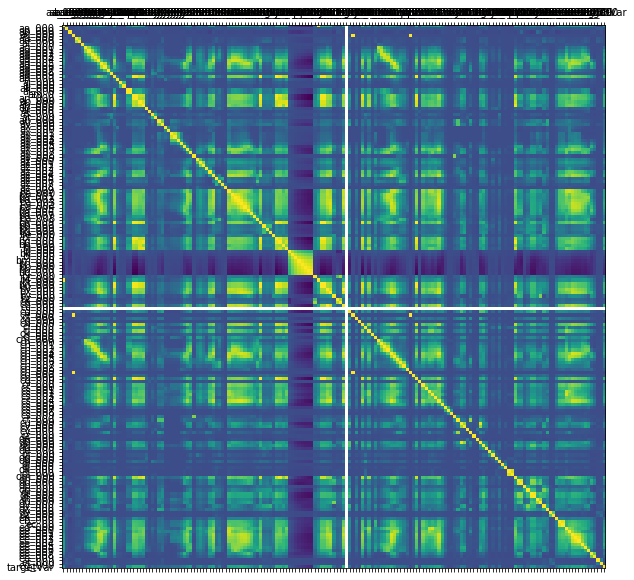

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_aps = apsdata.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr_aps)
plt.xticks(range(len(corr_aps.columns)), corr_aps.columns);
plt.yticks(range(len(corr_aps.columns)), corr_aps.columns);

# 2(b.) (iv.) Scatterplots!

In [36]:
sorted_by_valueaps = sorted(cv_aps.items(), key=lambda kv: kv[1])
sorted_by_valueaps.reverse()
import math as math
n_featuresaps = math.floor(math.sqrt(170))
sorted_by_valueaps[0:n_featuresaps]


[('cf_000', 6454075672.470604),
 ('co_000', 6441802435.148333),
 ('ad_000', 6436987419.389505),
 ('dq_000', 1954608455.7908676),
 ('ac_000', 1674811031.218511),
 ('eb_000', 204756812.23472592),
 ('df_000', 86818335.54989423),
 ('dh_000', 54605236.095034435),
 ('dl_000', 40507478.28801819),
 ('cs_009', 37986818.58037028),
 ('du_000', 32219606.343557477),
 ('ay_001', 27490901.863609675),
 ('bb_000', 26627539.54630497)]

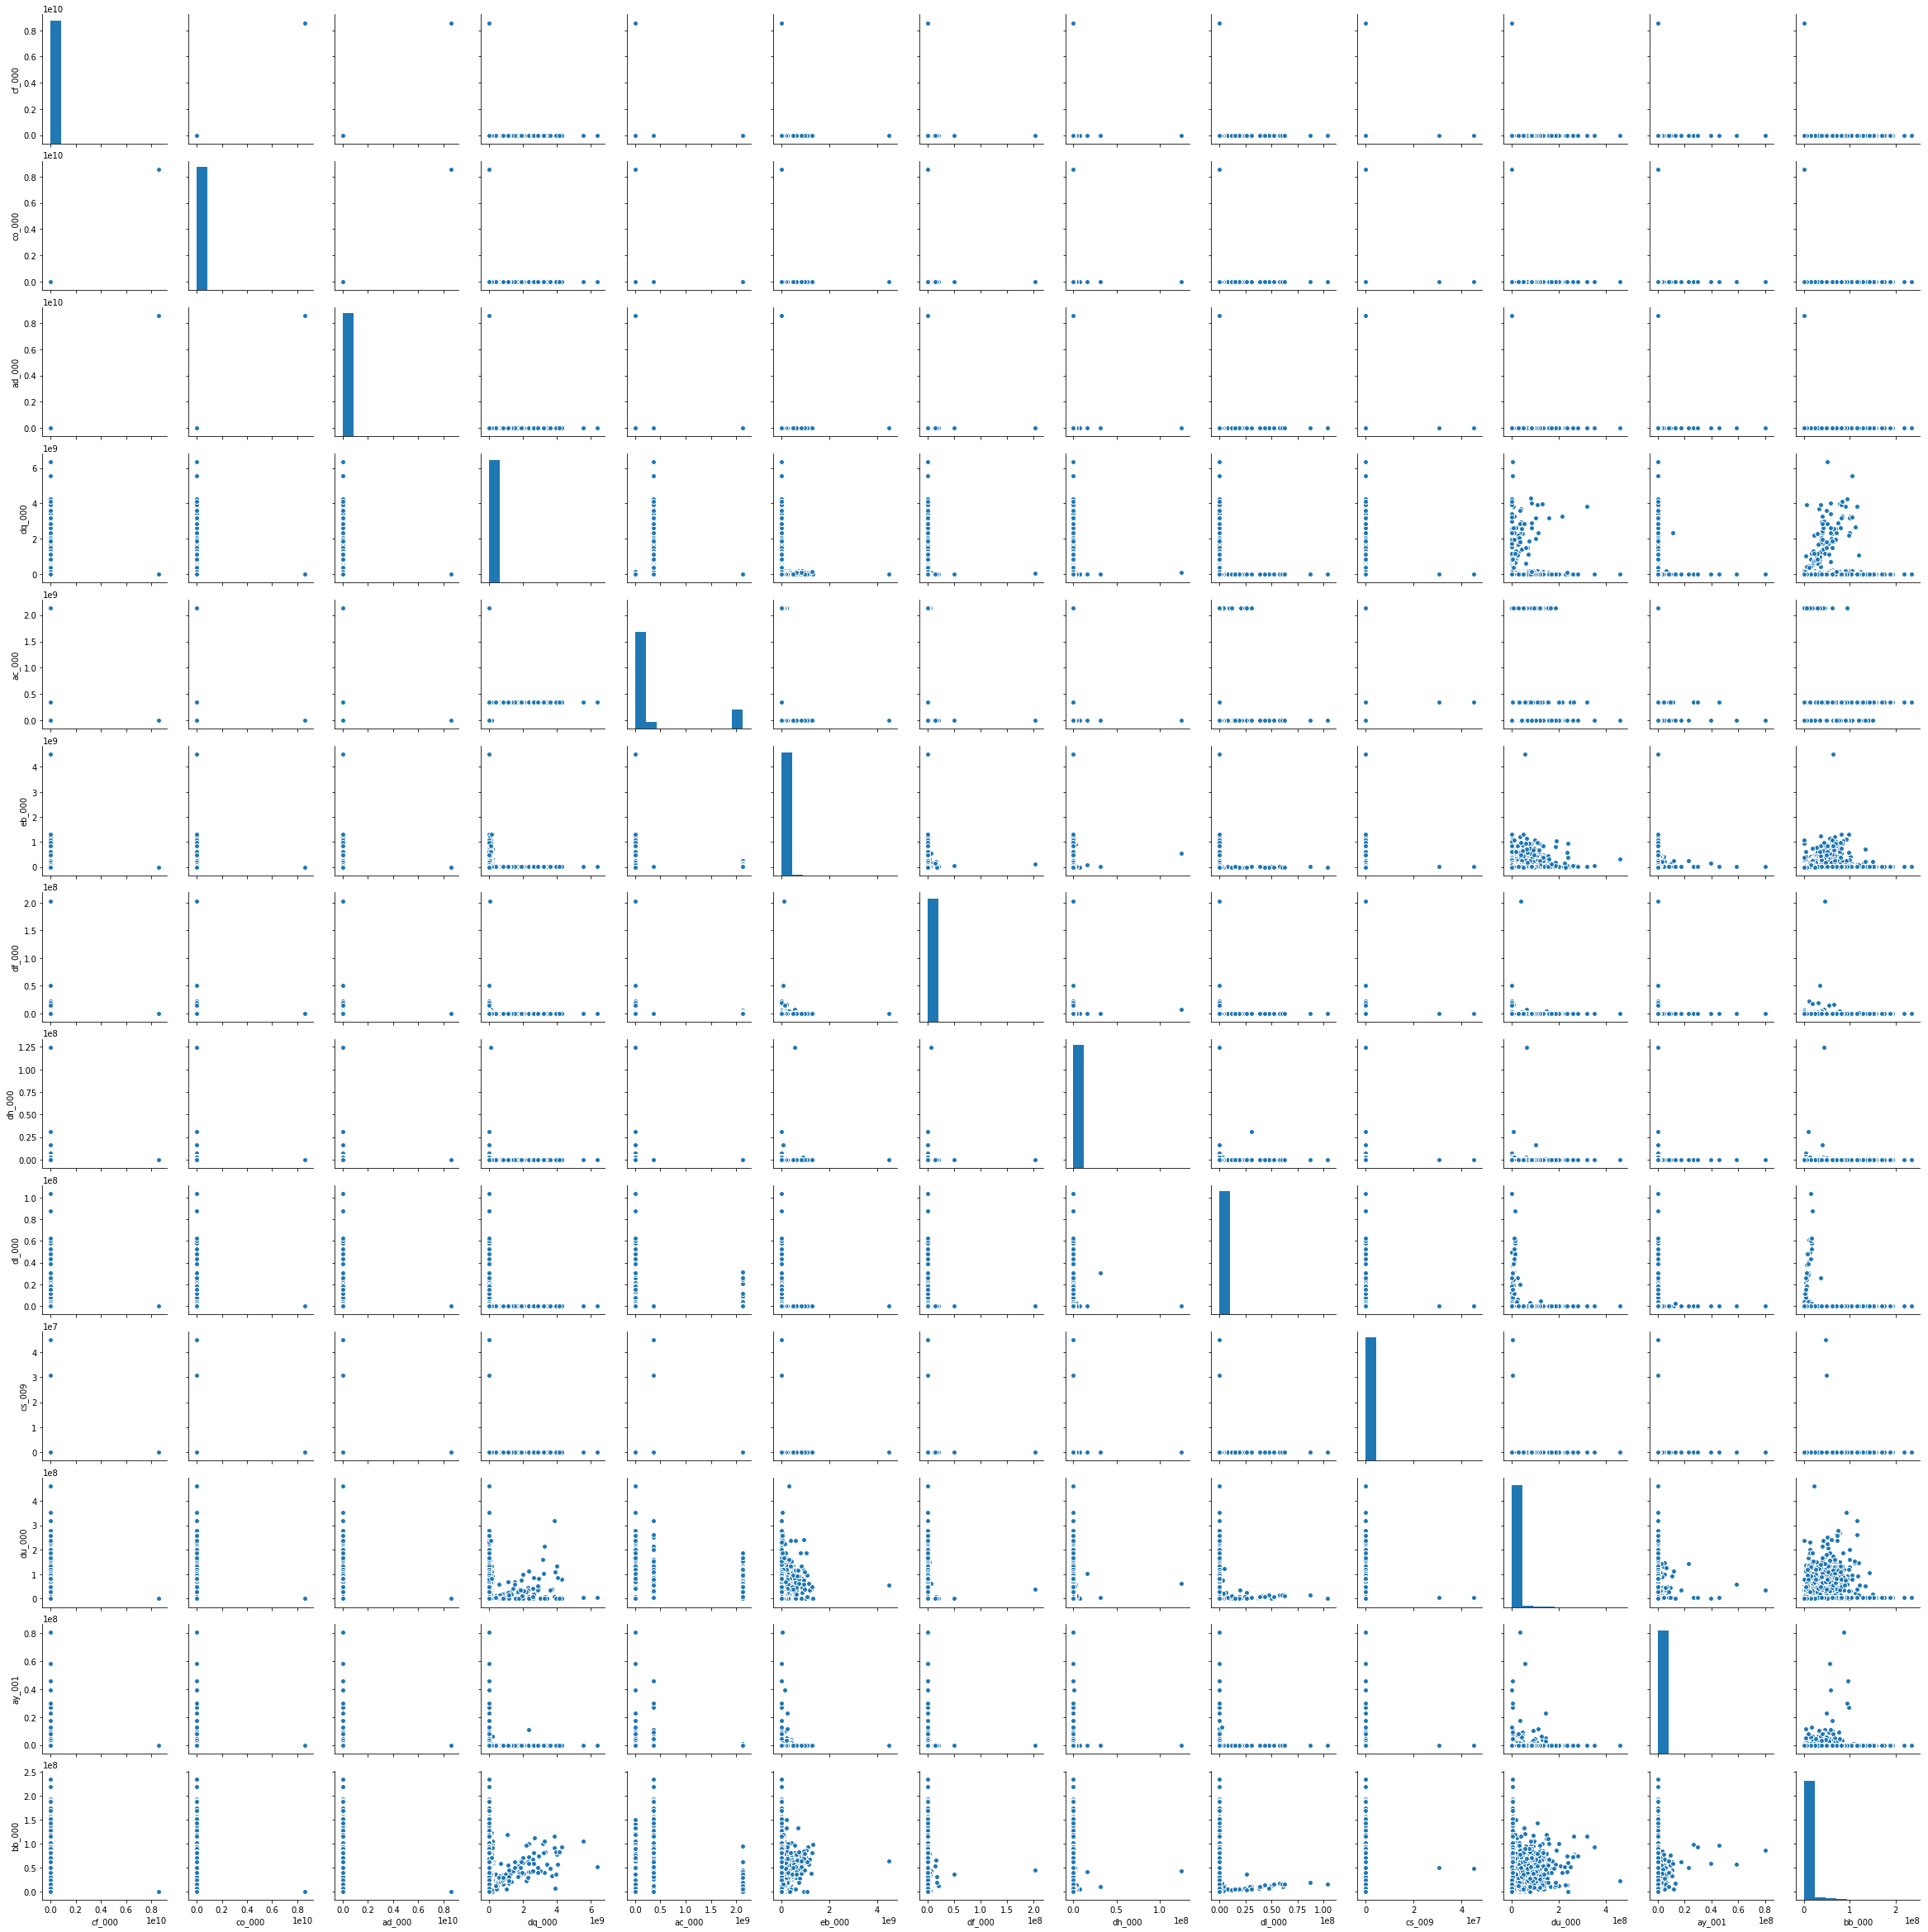

In [99]:
#scatterplots 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dataplotaps = apsdata[['cf_000','co_000','ad_000','dq_000','ac_000','eb_000','df_000','dh_000','dl_000','cs_009','du_000','ay_001','bb_000']]

sns.pairplot(dataplotaps)
plt.show()



# Boxplots: 

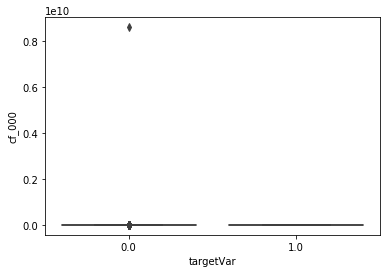

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="cf_000", data=apsdata)
plt.show()


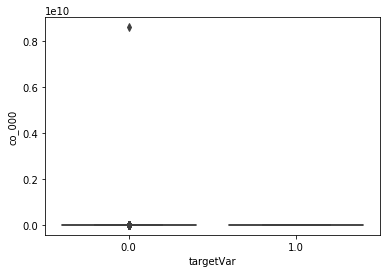

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="co_000", data=apsdata)
plt.show()



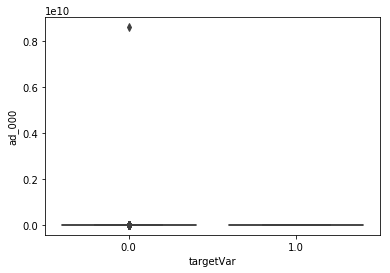

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="ad_000", data=apsdata)
plt.show()




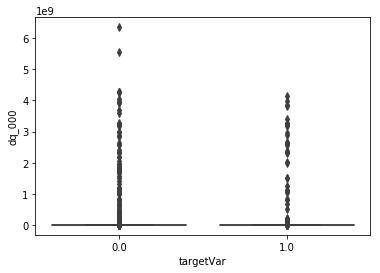

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="dq_000", data=apsdata)
plt.show()


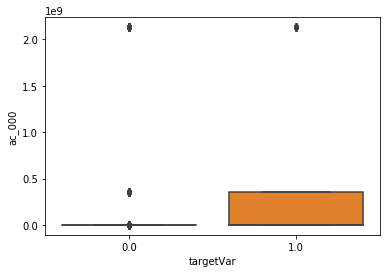

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="ac_000", data=apsdata)
plt.show()


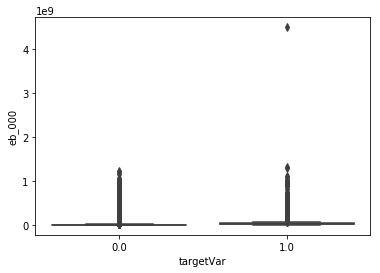

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="eb_000", data=apsdata)
plt.show()


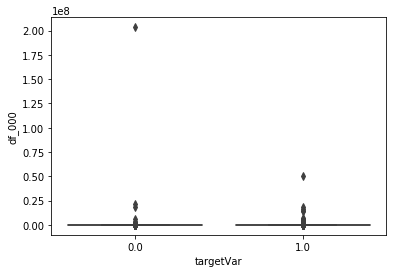

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="df_000", data=apsdata)
plt.show()



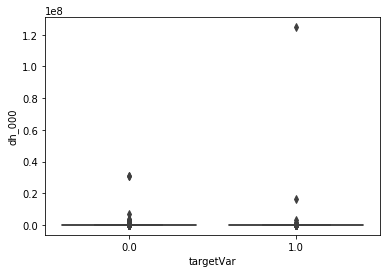

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="dh_000", data=apsdata)
plt.show()


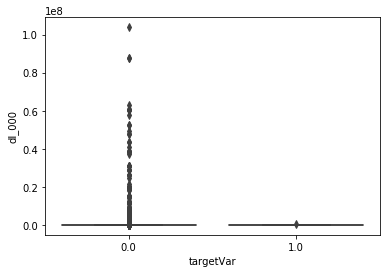

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="dl_000", data=apsdata)
plt.show()


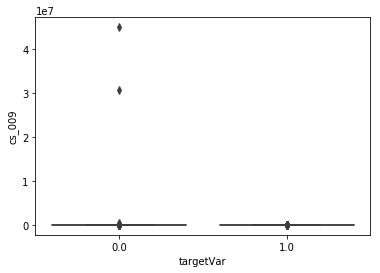

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="cs_009", data=apsdata)
plt.show()

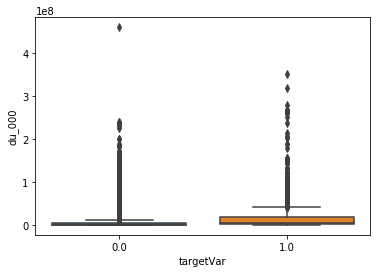

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="du_000", data=apsdata)
plt.show()


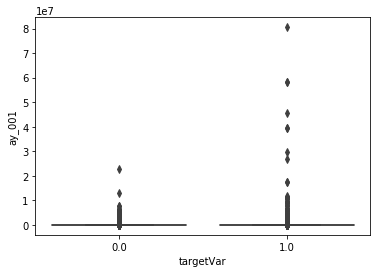

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="ay_001", data=apsdata)
plt.show()


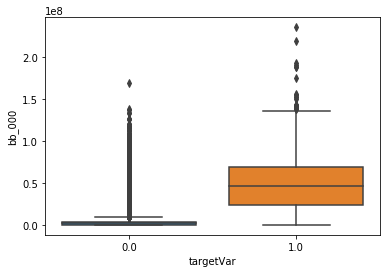

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(x="targetVar", y="bb_000", data=apsdata)
plt.show()

# 2(b.) (v.) Determine no of negative and positive classs


In [38]:
 print(apsdata.groupby('targetVar').size())
print('yes the data has imabalanced classification')

targetVar
0.0    74625
1.0     1375
dtype: int64
yes the data has imabalanced classification


# Yes the class is highly imbalalnced. 

# 2(c.) Random Forest: 

In [39]:
#Dividing the dataset : 
trainData = apsdata[0:60000]
testdata = apsdata[60000:]
X_train = trainData.drop('targetVar',axis = 1)
Y_train = trainData["targetVar"]
X_test = testdata.drop('targetVar',axis = 1)
Y_test = testdata["targetVar"]


# considerations while making the model for Random forests : 
n_estimators : 
This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

OOB_SCORE
This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.

In [79]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,oob_score=True)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

# Calculate CM, Accuracy score and Classification report on test dataset:

In [72]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
y_pred_train=clf.predict(X_train)
print("Test Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Test confusion matrix:",metrics.confusion_matrix(Y_test, y_pred))
print("Classification Report for test data:",classification_report(Y_test,y_pred))



Test Accuracy: 0.992125
Test confusion matrix: [[15606    19]
 [  107   268]]
Classification Report for test data:              precision    recall  f1-score   support

        0.0       0.99      1.00      1.00     15625
        1.0       0.93      0.71      0.81       375

avg / total       0.99      0.99      0.99     16000



# Calculating the CM, Accuracy score and classifictaion score on train data

In [73]:
print("Train Accuracy:",metrics.accuracy_score(Y_train, y_pred_train))
print("Train confusion matrix:",metrics.confusion_matrix(Y_train, y_pred_train))
print("Classification Report for train data:",classification_report(Y_train,y_pred_train))

Train Accuracy: 0.999983333333
Train confusion matrix: [[59000     0]
 [    1   999]]
Classification Report for train data:              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     59000
        1.0       1.00      1.00      1.00      1000

avg / total       1.00      1.00      1.00     60000



# ROC Curve for test data : 

[ 0.        0.001216  1.      ] [ 0.          0.71466667  1.        ]


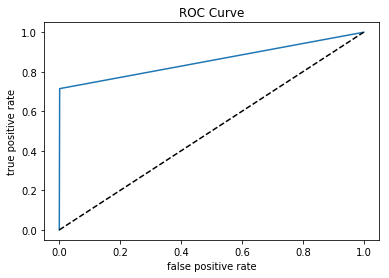

In [75]:
from sklearn import metrics
preds = clf.predict_proba(X_test)
preds.shape
prediction = clf.predict(X_test)
prediction.shape
fpr, tpr, _  = metrics.roc_curve(Y_test,prediction)
print(fpr,tpr)
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

# ROC curve for test data : 

[ 0.  1.] [ 0.999  1.   ]


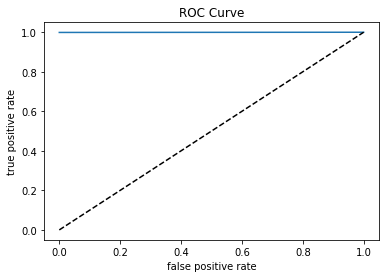

In [76]:
from sklearn import metrics
preds = clf.predict_proba(X_train)
preds.shape
prediction = clf.predict(X_train)
prediction.shape
fpr, tpr, _  = metrics.roc_curve(Y_train,prediction)
print(fpr,tpr)
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

# Calculating OOB Error : 

In [80]:
oob_error = 1 - clf.oob_score_
print("OOB Score is :",oob_error)

OOB Score is : 0.00603333333333


# For random forest without maintaing class imblance , the results are as follows : 
We can try maintaining the classifiers for different number of estimators. 
Test Accuracy: 0.992125 
Train Accuracy: 0.999983333333
OOB : 0.00603333333333 vs Test error : 0.0079
This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.


# 2(d.) Research how class imbalance is addressed in random forests.

# Ways to handle : 
a. Ensemle cross validation
b. Ensemble CV with class-weights
d. Sampling : Oversampling and Undersampling 


So Random forests handles class imbalnce in sklearn via : 
1) The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
2) The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

In [40]:
class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        no_class = len(np.unique(y))

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_proba = np.zeros((X.shape[0], no_class))
        test_proba = np.zeros((T.shape[0], no_class))
        
        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                ## Probabilities
                valid_proba = clf.predict_proba(X_valid)
                train_proba[valid_idx, :] = valid_proba
                test_proba  += clf.predict_proba(T)
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
                
            test_proba /= self.n_splits
            
        return train_proba, test_proba, train_pred, test_pred

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc,classification_report, recall_score, precision_recall_curve

random_state = 2018
np.random.seed(random_state)
rdf = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=True,
            random_state=random_state,
            verbose=0, warm_start=False)

In [42]:
base_models = [rdf]
n_splits = 5
lgb_stack = Create_ensemble(n_splits = n_splits, base_models = base_models)        



In [65]:
train_proba, test_proba, train_pred, test_pred = lgb_stack.predict(X_train, Y_train, X_test )

Model- 0 and CV- 0 recall: 0.9465677966101695, f1_score: 0.7553359388790479
Model- 0 and CV- 1 recall: 0.9421610169491526, f1_score: 0.758809450386722
Model- 0 and CV- 2 recall: 0.9494491525423729, f1_score: 0.7600260182317076
Model- 0 and CV- 3 recall: 0.935, f1_score: 0.7588050776110813
Model- 0 and CV- 4 recall: 0.9236864406779661, f1_score: 0.7651791854455976


# Results for training data : 

In [85]:
rfBalanced_sub = RandomForestClassifier(warm_start=True, oob_score=True,random_state=0, class_weight="balanced_subsample")                                   
rfBalanced_sub.fit(X_train, Y_train)
y_pred = rfBalanced_sub.predict(X_test)


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:497: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# Results when class_weight is balanced and proba!

In [86]:
print('0. The accuracy score of the model {}\n'.format(metrics.accuracy_score(Y_train, train_pred)))
print('1. The F-1 score of the model {}\n'.format(f1_score(Y_train, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(Y_train, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(Y_train, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(Y_train, train_pred)))

0. The accuracy score of the model 0.9735666666666667

1. The F-1 score of the model 0.7595517073541933

2. The recall score of the model 0.9393728813559322

3. Classification report 
              precision    recall  f1-score   support

        0.0       1.00      0.97      0.99     59000
        1.0       0.38      0.90      0.53      1000

avg / total       0.99      0.97      0.98     60000
 

4. Confusion matrix 
 [[57510  1490]
 [   96   904]] 



# Results when balanced _Subsampling is used : 

In [87]:
print('0. The accuracy score of the model {}\n'.format(metrics.accuracy_score(Y_train, train_pred)))
print('3. Classification report \n {} \n'.format(classification_report(Y_train, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(Y_train, train_pred)))
print("OOB score is : ")
print(rfBalanced_sub.oob_score_)

0. The accuracy score of the model 0.9735666666666667

3. Classification report 
              precision    recall  f1-score   support

        0.0       1.00      0.97      0.99     59000
        1.0       0.38      0.90      0.53      1000

avg / total       0.99      0.97      0.98     60000
 

4. Confusion matrix 
 [[57510  1490]
 [   96   904]] 

OOB score is : 
0.989683333333


# ROC Curve for test model : 

[ 0.        0.001088  1.      ] [ 0.     0.504  1.   ]


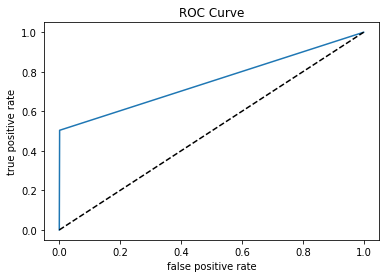

In [89]:
fpr, tpr, _  = metrics.roc_curve(Y_test,y_pred)
print(fpr,tpr)
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

# AUC balanced 

In [91]:
roc_auc_score(Y_test, y_pred)

0.75145600000000001

In [95]:
oob_error = 1 - rfBalanced_sub.oob_score_
print("OOB ERROR IS : ")
print(oob_error)
predicted = rfBalanced_sub.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, predicted) #MSE
print("Test Error:")
print(1-accuracy)

OOB ERROR IS : 
0.0103166666667
Test Error:
0.0126875


# OOB error and test error are again very much near to each other 0.010 and 0.011. Both these are almost same, thus OOB can be a good measure as its a out of the bag error

# Comparison of test and train results with 2c:

# 1) Comparing both confusion matrix we can conclude that without balanced sub-sample is a good technique because it does better on pos classes (178 failure cases vs 107 failure cases)
2) Comparing ROC i.e. TPR, FPR, TN, FN  we get that : recall is 0.53 for balanced case where as unbalanced it is 0.71. F1 score is 0.67 for balanced dataset where as for un-balanced it is 0.81. Thus unbalanced is better
3) Comparing the OOB scores (train accuracy) which is 0.9896 in balanced and 0.9919 in unbalanced. So even for training un-balanced is a better choice.
4) Comparing AUC scores of 0.7622 in balanced vs 0.8568 of unbalanced, we see that AUC is more in un-balanced, thus it is preferred.
5) Misclassification as explained in first point : it is high(178) in balanced dataset vs low(107) in un-balanced dataset (considering the minimal dataset class of pos)

Thus unbalanced is a better choice. One possible explanation of this behavior is due to balancing there will be more number of pos class samples in every bootstrap thus confusing the Random forest to over train on neg classes.